<h1> Route Optimisation Through Centralised Control </h1>
<h2> Libraries </h2>

In [3]:
import os
import numpy as np
import sys
import math
import random
import networkx as nx
import copy
from collections import deque


modulenames = set(sys.modules) & set(globals())
mNames      = ("\n    ").join([name for name in modulenames])
print("Imported following modules:")
print("    " + mNames)

Imported following modules:
    copy
    sys
    math
    random
    os


<h2> Simple</h2>

In [42]:
def routeFinder(network, route):
    system = copy.deepcopy(network)
    system.nodes[route[0]]["time"] = 0
    system.nodes[route[0]]["path"]  = [route[0]]
    nextNode = [route[0]]
    while nextNode != [] and nextNode[0] != route[1]:
        listRoutes(system, nextNode)
    if nextNode == []:
        raise Exception("Route not found")
    for p in range(len(system.nodes[route[1]]["path"]) - 1):
        network[system.nodes[route[1]]["path"][p]][system.nodes[route[1]]["path"][p+1]]["traffic"] += 1
    return system.nodes[route[1]]["path"], system.nodes[route[1]]["time"]

def listRoutes(system, nodes: list):
    
    node = nodes.pop(0)
    
    for destination, details in system[node].items():
        if "time" in system.nodes[destination]:
            if system.nodes[destination]["time"] <= system.nodes[node]["time"] + details["time"](details["traffic"]):
                continue
            
        system.nodes[destination]["time"] = system.nodes[node]["time"] + details["time"](details["traffic"])
        
        system.nodes[destination]["path"] = (list(system.nodes[node]["path"]))
        system.nodes[destination]["path"].append(destination)
        a = 0
        b = len(nodes) - 1
        while a < b:
            
            if system.nodes[nodes[int((a+b)/2)]]["time"] < system.nodes[destination]["time"]:
                a = int((a+b) / 2) + 1
            else:
                b = int((a+b) / 2)
            
        if  nodes == [] or system.nodes[nodes[int(a)]]["time"] > system.nodes[destination]["time"]:
            nodes.insert(int(a), destination)
        else:
            nodes.insert(int(a + 1), destination)





(['A', 'D', 'B', 'C'], 0.0)
(['A', 'D', 'B', 'C'], 4.0)
(['A', 'D', 'B', 'C'], 8.0)
(['A', 'D', 'B', 'C'], 12.0)
(['A', 'D', 'B', 'C'], 16.0)
(['A', 'D', 'B', 'C'], 20.0)
(['A', 'D', 'B', 'C'], 24.0)
(['A', 'D', 'B', 'C'], 28.0)
(['A', 'D', 'B', 'C'], 32.0)
(['A', 'D', 'B', 'C'], 36.0)
(['A', 'B', 'C'], 40.0)
(['A', 'B', 'D', 'C'], 40.0)
(['A', 'B', 'D', 'C'], 40.0)


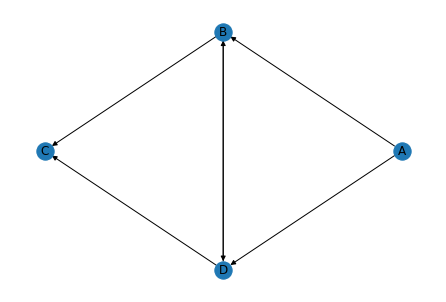

In [51]:
class Ex1:
    def __init__(self, graph = False):
        self.ex1 = nx.DiGraph()

        towns = [chr(65+i) for i in range(4)]
        inf = float("inf")

        self.ex1.add_nodes_from(towns)
        for i, town1 in enumerate(towns):
            for j, town2 in enumerate(towns):
                time = self.times(i, j)
                if time(0) != inf:
                    self.ex1.add_edge(town1, town2, time = time, traffic = 0)
        if graph == True:
            nx.draw_circular(self.ex1, with_labels = True)

    def times(self, i, j):
        inf = float("inf")
        time = lambda t: np.array([[inf, 20, inf, t/10],
                                [inf, inf, t/10, 0],
                                [inf, inf, inf, inf],
                                [inf, 0, 20, inf],])
        return lambda t: time(t)[i, j]

    def network(self, route = ("A", "C")):
        return routeFinder(self.ex1, route)

example1 = Ex1(True)
for i in range(251):
    if i % 20 == 0:
        print(example1.network(("A", "C")))
    else:
        example1.network(("A", "C"))



<h2> Example Case 2</h2>

/tmp/ipykernel_17400/909878653.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return lambda t: self.time[i, j] / self.chance[i, j]


(['A', 'I', 'D', 'C'], 0.4602077857160217)


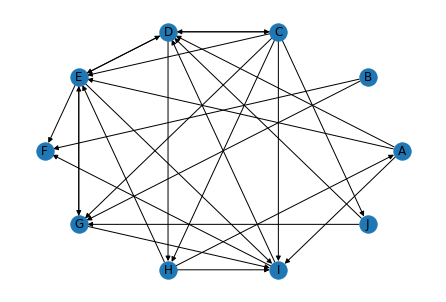

In [8]:
class Ex2:
    def __init__(self, nodes, trigger):
        self.towns = nodes
        self.chance = np.random.rand(nodes, nodes) > trigger
        self.time = np.random.rand(nodes, nodes)

    def times(self, i, j):
        inf = float("inf")
        return lambda t: self.time[i, j] / self.chance[i, j]

    def network(self, traffic, route = ("A", "C"), graph = False):
        ex1 = nx.DiGraph()

        towns = [chr(65+i) for i in range(self.towns)]
        inf = float("inf")

        ex1.add_nodes_from(towns)
        for i, town1 in enumerate(towns):
            for j, town2 in enumerate(towns):
                time = self.times(i, j)
                if time(0) != inf:
                    ex1.add_edge(town1, town2, time = time, traffic = traffic)
        if graph == True:
            nx.draw_circular(ex1, with_labels = True)

        return routeFinder(ex1, route)

example2 = Ex2(10, 0.7)
print(example2.network(100, ("A", "C"), True))

<h3> Visualisation </h3>

In [54]:
def hey():
    def bye():
        print("bye")
    print("hey")
    bye()

hey()

hey
bye
